In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import pylab as pl

import seaborn as sns
import altair as alt
from vega_datasets import data

%load_ext autoreload
%autoreload 2

alt.renderers.enable('notebook')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)
sns.set_style=('white')
sns.despine()

In [2]:
def demo_plot(steps=20):
    # Initialize
    start = [100]
    N = [0]

    rs = np.random.RandomState(9)
    x, y = rs.multivariate_normal([0,0], [(1, 0), (0, 2)], 100).T
    x1, y1 = rs.multivariate_normal([80,70], [(1, 0), (0, 2)], 100).T

    for n in range(steps):

        plt.subplot(121)
        sns.despine()
        
        # Calculate next step of performance. 
        # Here is where the actual output of the model will be placed
        start.append(start[n]-np.random.random(1)[0]*3)
        N.append(n)
        
        # plot performance
        plt.plot(N,start,'r-')
        plt.xlim((0,100))
        plt.ylim((0,100))
        plt.title('Performance '+str(np.round(start[n],2)))

        plt.subplot(122)
        sns.despine()
        
        # Calculate next step of clusters
        x += np.random.random(size=x.shape)*2
        y += np.random.random(size=y.shape)*2

        x1 -= np.random.random(size=x1.shape)*2
        y1 -= np.random.random(size=y1.shape)*2
        
        # plot the clusters
        plt.plot(x, y, '.')
        plt.plot(x1, y1, '.')
        plt.xlim(0,100)
        plt.ylim(0,100)

        # Update the display
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(.01)
        
        # Add close, so it runs faster and the final plot isn't made cuz we don't need that in our life
        plt.close()


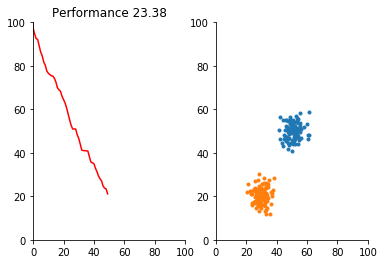

In [17]:
demo_plot(50)

In [4]:
rs = np.random.RandomState(n)
mean = [np.random.random(1)[0], np.random.random(1)[0]]
cov = [(1, 0), (0, 2)]
x, y = rs.multivariate_normal(mean, cov, 100).T
x1, y1 = rs.multivariate_normal([80,70], cov, 100).T

for n in range(100):
    x += np.random.random(size=x.shape)*2
    y += np.random.random(size=y.shape)*2
    
    x1 -= np.random.random(size=x1.shape)*2
    y1 -= np.random.random(size=y1.shape)*2
    plt.plot(x, y, '.')
    plt.plot(x1, y1, '.')
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.xlim(0,100)
    plt.ylim(0,100)
    sns.despine()
    display.clear_output(wait=True)
    display.display(pl.gcf())
#     if n % 2:
    plt.close()
#     time.sleep(.01)

NameError: name 'n' is not defined

Dancing violin plots

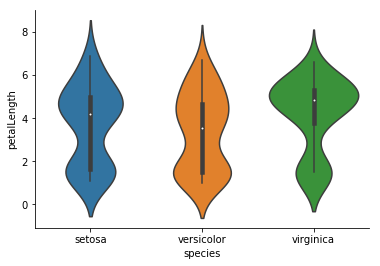

In [18]:
dataset = data.iris()
x = dataset['petalLength'].copy()
y = dataset['species'].copy()

for n in range(50):
    np.random.shuffle(y)

#     data['species/'] *= np.random.random(1)[0]
    sns.violinplot(x=y, y=x, order=np.unique(y))
    sns.despine()
    display.clear_output(wait=True)
    display.display(pl.gcf())
    plt.close()

Groovy

## Trying that shit with roving balls

In [4]:
from olac.data_generators import roving_balls

In [5]:
roving_balls(steps=10)

<generator object roving_balls at 0x10833c4c0>

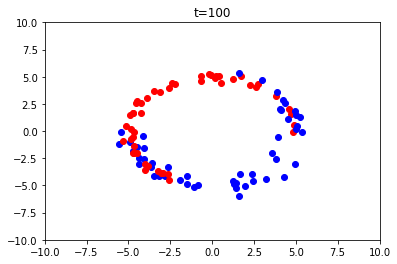

In [19]:

for t, x in enumerate(roving_balls(steps=100, period=150, var1=0.2, var2=0.5)):
    plt.scatter(*x[:2], color=['r','b'][int(x[-1])])
    plt.title(f't={t}')
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    display.clear_output(wait=True)
    display.display(plt.gcf())
plt.close()

## w perceptron

Load perceptron function and generate data

In [326]:
import olac.perceptron as pc
X, yhat = generate_data(int(1e4))

Train network.

In [137]:
w1, b1, w2, b2, costs, y_hat_saved = pc.train_network(X, yhat, 0.0001, 400, 4)

Training accuracy after epoch 0: 58.7900%
Training accuracy after epoch 10: 50.0000%
Training accuracy after epoch 20: 50.8900%
Training accuracy after epoch 30: 51.0100%
Training accuracy after epoch 40: 55.6100%
Training accuracy after epoch 50: 54.5000%
Training accuracy after epoch 60: 54.6100%
Training accuracy after epoch 70: 62.1100%
Training accuracy after epoch 80: 60.8900%
Training accuracy after epoch 90: 63.2000%
Training accuracy after epoch 100: 62.9900%
Training accuracy after epoch 110: 65.0400%
Training accuracy after epoch 120: 56.1300%
Training accuracy after epoch 130: 60.4900%
Training accuracy after epoch 140: 64.9700%
Training accuracy after epoch 150: 65.1800%
Training accuracy after epoch 160: 85.3200%
Training accuracy after epoch 170: 88.8700%
Training accuracy after epoch 180: 92.3800%
Training accuracy after epoch 190: 94.0500%
Training accuracy after epoch 200: 95.0700%
Training accuracy after epoch 210: 91.6600%
Training accuracy after epoch 220: 90.7200%

For the trained network, create updating plot that shows the accuracy vs the predictions over time

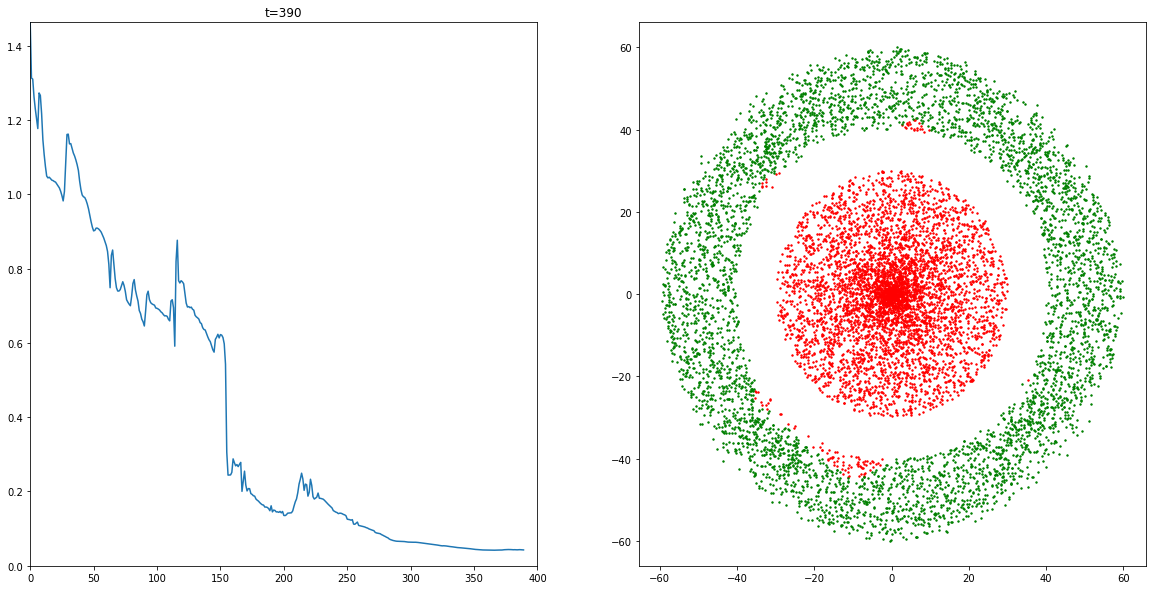

In [265]:

for t, x in enumerate(costs):
    if t % 10 ==0:
        plt.figure(figsize = (20, 10))
        plt.subplot(121)
        plt.plot(costs[:t])
        plt.xlim(0, len(costs))
        plt.ylim(0, max(costs))
        plt.title(f't={t}')
        plt.subplot(122)
        plt.scatter(*X[y_hat_saved[t].astype(np.bool)].T, color='r', s=2)
        plt.scatter(*X[~y_hat_saved[t].astype(np.bool)].T, color='g', s=2)

        display.clear_output(wait=True)
        display.display(plt.gcf())
    plt.close()

Try with moving data

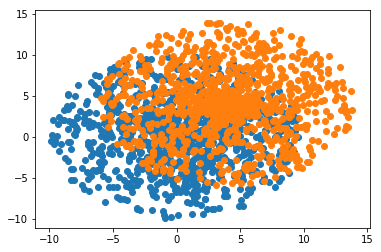

In [215]:
plt.scatter(*pc.rand_cluster(1000, (0,0), 10).T)
plt.scatter(*(pc.rand_cluster(1000, (0,0), 10)+np.array((4,4)).T).T)

In [22]:
def get_moving_data(N):
    X = []
    rs = np.random.RandomState(9)
    x, y = rs.multivariate_normal([0,0], [(1, 0), (0, 2)], 100).T
    x1, y1 = rs.multivariate_normal([80,70], [(1, 0), (0, 2)], 100).T
    X.append(np.hstack((np.vstack((x, x1))),((np.vstack(y, y1))))
    for n in range(N):
    
        x += np.random.random(size=x.shape)*2
        y += np.random.random(size=y.shape)*2

        x1 -= np.random.random(size=x1.shape)*2
        y1 -= np.random.random(size=y1.shape)*2
        
        X.append(np.hstack((np.vstack(x, x1),np.vstack(y, y1))))
    return X

SyntaxError: invalid syntax (<ipython-input-22-51411770d217>, line 7)

In [20]:
get_moving_data(10, )

TypeError: hstack() takes 1 positional argument but 2 were given

In [5]:
n_samples = 1000
moving_data1 = np.repeat(pc.rand_cluster(n_samples, (0,0),10),100,1)
moving_data1 = np.reshape(moving_data1, (n_samples,2,100))
moving_data1 = moving_data1 + np.array((np.linspace(0,100,100),np.linspace(0,100,100)))


moving_data2 = np.repeat(pc.rand_cluster(n_samples, (0,5),10),100,1)
moving_data2 = np.reshape(moving_data2, (n_samples,2,100))
moving_data2 = moving_data2 + np.array((np.linspace(0,100,100),np.linspace(0,100,100)))
    
y0 = np.zeros(shape=(int(n_samples), 1))
y1 = np.ones(shape=(int(n_samples), 1))
labels = np.vstack([y0, y1])
labels = np.repeat(labels,100,1)

In [6]:
moving_data = np.vstack((moving_data1, moving_data2))


Train model on first set of clusters

In [7]:
w1, b1, w2, b2, costs, y_hat_saved = pc.train_network(moving_data[:,:,0], labels[:,0], 0.0001, 200, 3)

Training accuracy after epoch 0: 81.5000%
Training accuracy after epoch 10: 90.5500%
Training accuracy after epoch 20: 94.7500%
Training accuracy after epoch 30: 97.0500%
Training accuracy after epoch 40: 98.3500%
Training accuracy after epoch 50: 98.8000%
Training accuracy after epoch 60: 99.4000%
Training accuracy after epoch 70: 99.7000%
Training accuracy after epoch 80: 99.9000%
Training accuracy after epoch 90: 99.9000%
Training accuracy after epoch 100: 100.0000%
Training accuracy after epoch 110: 100.0000%
Training accuracy after epoch 120: 100.0000%
Training accuracy after epoch 130: 100.0000%
Training accuracy after epoch 140: 100.0000%
Training accuracy after epoch 150: 100.0000%
Training accuracy after epoch 160: 100.0000%
Training accuracy after epoch 170: 100.0000%
Training accuracy after epoch 180: 100.0000%
Training accuracy after epoch 190: 100.0000%
Training accuracy after epoch 199: 100.0000%


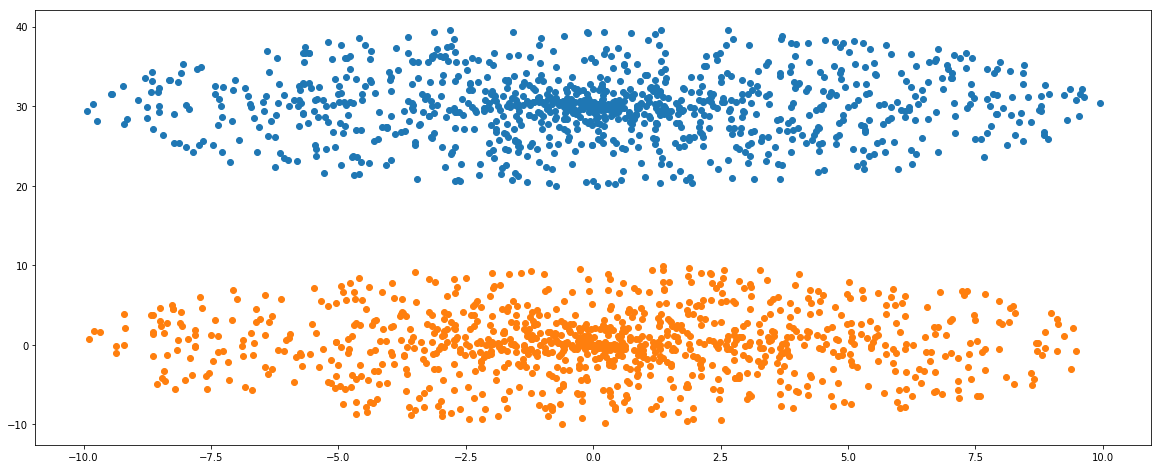

In [8]:
plt.scatter(*moving_data[y_hat_saved[199]==1,:,0].T)
plt.scatter(*moving_data[y_hat_saved[199]==0,:,0].T)

In [9]:
import olac.vis as vis
import olac.perceptron as pc

TypeError: scatter() takes from 2 to 15 positional arguments but 100 were given

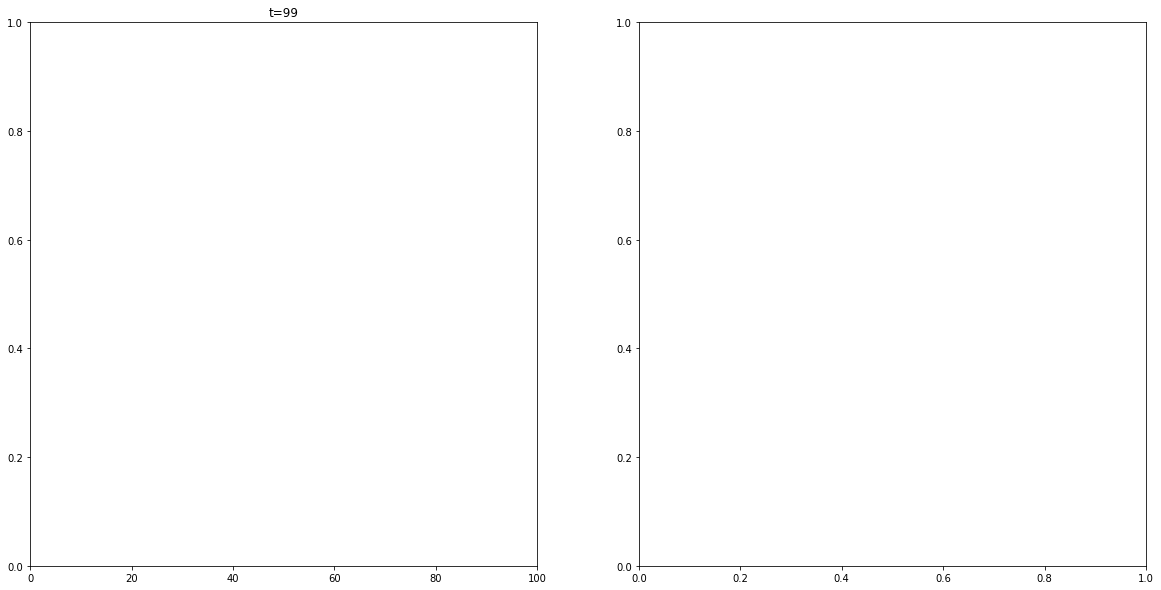

In [30]:
new_pred = []
new_acc = []

for m, X in enumerate(moving_data.T):
    new_pred, acc = vis.get_new_accuracy(X.T, labels[:,0], weights = (w1, b1, w2, b2))
    new_acc.append(acc)

    plt.figure(figsize = (20, 10))
    plt.subplot(121)
    plt.plot(np.arange(0, m+1), new_acc)
    plt.xlim(0, 100)
    plt.ylim(0, 1)
    plt.title(f't={n}')
    
    
    plt.subplot(122)
    x1 = np.linspace(-10,100,100)
    x2 = np.linspace(-1,100,100)
    fun_map = np.empty((x1.size, x2.size))
    for n,i in enumerate(x1):
        for m,j in enumerate(x2):
            fun_map[m,n] = pc.prediction([i,j], w1, b1, w2, b2)

# #             plt.subplot(int(np.round(nr_epochs/10/2))+2,2,s)
#     plt.imshow(fun_map, extent=[x1.min(), x1.max(), x2.min(), x2.max()], 
#                vmin=0, vmax=1, aspect='auto', origin='lower')
#     plt.colorbar()
    plt.scatter(*moving_data[new_pred==1,:].T, color='r')
    plt.scatter(*moving_data[new_pred==0,:].T, color='g')
#     plt.xlim(-1, 100)
#     plt.ylim(-1, 100)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.close()

In [26]:
for n in range(100):
    

(2000, 2, 100)